In [23]:
import numpy as np
import sys
from scipy import sparse
import math
import sys
import functools as ft
import matplotlib.pyplot as plt
from scipy.sparse.linalg import expm_multiply
from scipy.linalg import logm
import json
from scipy.stats import gaussian_kde



In [24]:
f = open('fig1_data.json')
data = json.load(f)
EnT = data['energies']
OneP3Exp = data['P3 Expectation']
OneP3Var = data['P3 Variance']
OneP5Exp = data['P5 Expectation']
OneP5Var = data['P5 Variance']

PlaqD8Exp = data['D8 Expectation']
PlaqD8Var = data['D8 Variance']

PlaqD10Exp = data['D10 Expectation']
PlaqD10Var = data['D10 Variance']


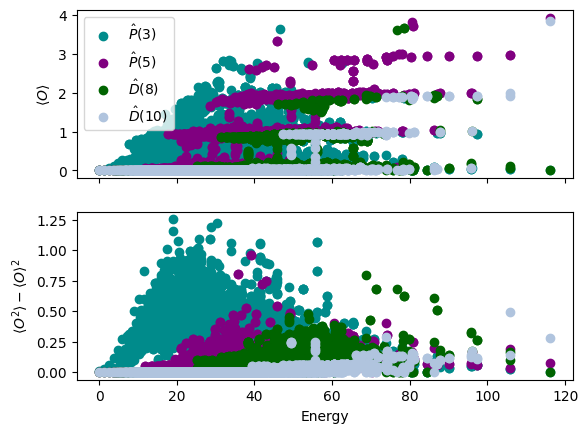

In [25]:
#Figure 1

fig, axs = plt.subplots(2,sharex=True, gridspec_kw={'height_ratios': [1, 1]})
PlotColors=['darkcyan','purple','darkgreen','lightsteelblue']
axs[0].scatter(EnT,OneP3Exp,label='$\hat{P}(3)$',color=PlotColors[0])
axs[0].scatter(EnT,OneP5Exp,label='$\hat{P}(5)$',color=PlotColors[1])
axs[0].scatter(EnT,PlaqD8Exp,label='$\hat{D}(8)$',color=PlotColors[2])
axs[0].scatter(EnT,PlaqD10Exp,label='$\hat{D}(10)$',color=PlotColors[3])
#plt.xlabel('Energy')
#plt.ylabel('<O>')
axs[0].legend(loc=2)
axs[0].set_ylabel('$\langle O \\rangle$')
axs[1].scatter(EnT,OneP3Var,label='$\hat{P}(3)$',color=PlotColors[0])
axs[1].scatter(EnT,OneP5Var,label='$\hat{P}(5)$',color=PlotColors[1])
axs[1].scatter(EnT,PlaqD8Var,label='$\hat{D}(8)$',color=PlotColors[2])
axs[1].scatter(EnT,PlaqD10Var,label='$\hat{D}(10)$',color=PlotColors[3])
axs[1].set_xlabel('Energy')
axs[1].set_ylabel('$\langle O^2 \\rangle-\langle O \\rangle^2$')
plt.savefig('FragPlot.pdf')
plt.show()

In [26]:
f = open('fig2_data.json')
data = json.load(f)
EnT = data['energies']
EntropyT = data['entropies']
EnO = data['overlap energies']
EntropyO = data['overlap entropies']
ElEn = data['state energy']
ElVar = data['state variance']
tL = data['time points']
ElEvAll = data['electric dynamics']
ElEvAllMC = data['MC dynamics']

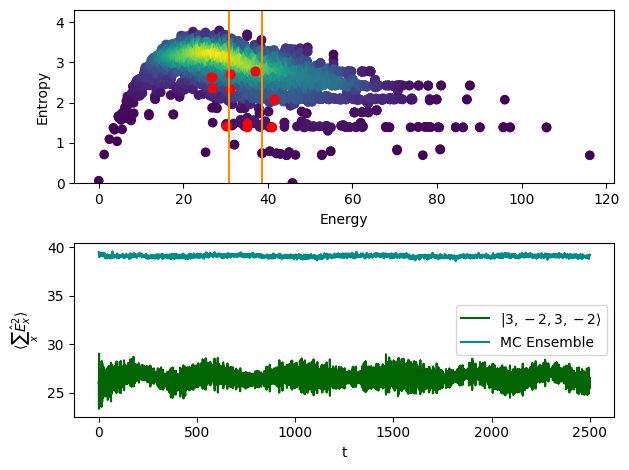

In [27]:
#Figure 2

fig, axs = plt.subplots(2)

xy = np.vstack([EnT,EntropyT])
z = gaussian_kde(xy)(xy)
axs[0].scatter(EnT,EntropyT,c=z)
#plt.scatter(EnMC,EntropyMC,color='darkorange')
axs[0].scatter(EnO,EntropyO,color='red')
axs[0].plot([ElEn-ElVar for n in range(50)],[0.1*n for n in range(50)],color='darkorange')
axs[0].plot([ElEn+ElVar for n in range(50)],[0.1*n for n in range(50)],color='darkorange')
axs[0].set_xlabel('Energy')
axs[0].set_ylabel('Entropy')
axs[0].set_ylim(0,4.3)

axs[1].plot(tL,ElEvAll,label='$|3,-2,3,-2\\rangle$',color=PlotColors[2])
axs[1].plot(tL,ElEvAllMC,label='MC Ensemble',color=PlotColors[0])
axs[1].set_xlabel('t')
axs[1].set_ylabel('$\langle \sum_x \hat{E}^2_x \\rangle $')
axs[1].legend()
plt.tight_layout()
plt.savefig('frozen_entropy.pdf')

In [28]:
f = open('fig3_data.json')
data = json.load(f)

TVal = data['time']
ElEv1 = data['1 String State Evolution']
ElEvMC1 = data['1 String MC']
ElEv2 = data['2 String State Evolution']
ElEvMC2 = data['2 String MC']
ElEv3 = data['3 String State Evolution']
ElEvMC3 = data['3 String MC']

NStep = 600
L = 6

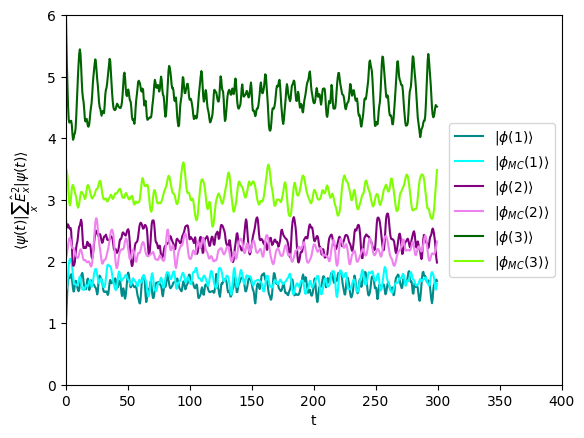

In [29]:
#Figure 3
PlotColors=['darkcyan','purple','darkgreen','lightsteelblue']
PlotColorsMC=['cyan','violet','chartreuse','lightsteelblue']

plt.plot(TVal,[(L-1)*np.mean(ElEv1[t]) for t in range(NStep+1)],color=PlotColors[0],label='$|\phi(1) \\rangle$')
plt.plot(TVal,[(L-1)*np.mean(ElEvMC1[t]) for t in range(NStep+1)],color=PlotColorsMC[0],label='$|\phi_{MC}(1) \\rangle$')

plt.plot(TVal,[(L-1)*np.mean(ElEv2[t]) for t in range(NStep+1)],color=PlotColors[1],label='$|\phi(2) \\rangle$')
plt.plot(TVal,[(L-1)*np.mean(ElEvMC2[t]) for t in range(NStep+1)],color=PlotColorsMC[1],label='$|\phi_{MC}(2) \\rangle$')

plt.plot(TVal,[(L-1)*np.mean(ElEv3[t]) for t in range(NStep+1)],color=PlotColors[2],label='$|\phi(3) \\rangle$')
plt.plot(TVal,[(L-1)*np.mean(ElEvMC3[t]) for t in range(NStep+1)],color=PlotColorsMC[2],label='$|\phi_{MC}(3) \\rangle$')

plt.xlabel('t')
plt.ylabel('$ \langle \psi(t) | \sum_x \hat{E}_x^2 |\psi(t)\\rangle$')
plt.xlim(0,400)
plt.ylim(0,6)
plt.legend(loc='center right')
plt.savefig('SU2_fragmentation.pdf')